In [55]:
import warnings
warnings.filterwarnings("ignore")
import env
import pandas as pd
import numpy as np
from pydataset import data
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import wrangle_zillow as wr
import explore as ex
import scipy.stats as stats
# supress scientific notation
np.set_printoptions(suppress=True)

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [2]:
zillow_df = pd.read_csv('zillow1.csv')

In [3]:
zillow_df.parcelid.unique().shape

(77381,)

In [4]:
wr.missing_values_table(zillow_df)

Your selected dataframe has 69 columns.
There are 52columns that have missing values.


,Missing Values,% of Total Values
buildingclasstypeid,77559,100.0
buildingclassdesc,77559,100.0
finishedsquarefeet13,77532,99.9
basementsqft,77524,99.9
storydesc,77524,99.9
storytypeid,77524,99.9
yardbuildingsqft26,77504,99.9
fireplaceflag,77402,99.8
architecturalstyledesc,77368,99.7
architecturalstyletypeid,77368,99.7


In [5]:
wr.cols_missing(zillow_df)

,num_cols_missing,num_rows,pct_cols_missing
0,23,2,11.5
1,24,13,12.0
2,25,24,12.5
3,26,65,13.0
4,27,316,13.5
5,28,457,14.0
6,29,5285,14.5
7,30,3465,15.0
8,31,9911,15.5
9,32,12606,16.0


In [6]:
zillow_df.dtypes

Unnamed: 0                        int64
id                                int64
parcelid                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6             float64
fips                            float64
fireplacecnt                    float64
fullbathcnt                     float64
garagecarcnt                    float64
garagetotalsqft                 float64
hashottuborspa                  float64


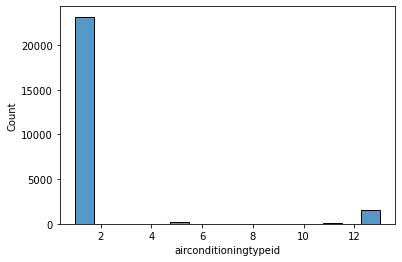

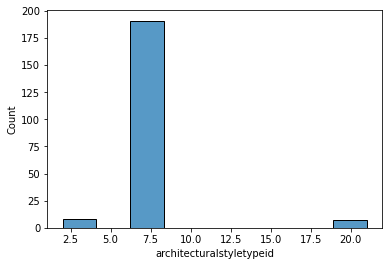

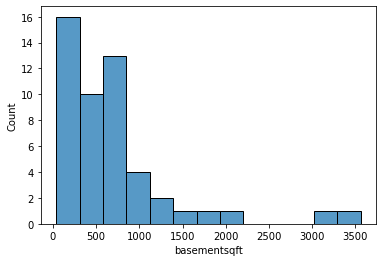

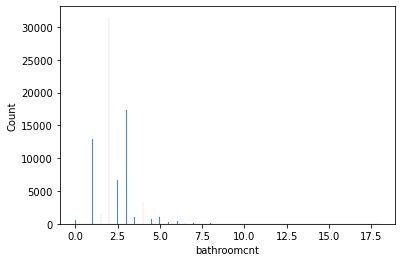

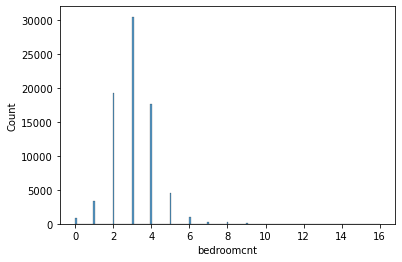

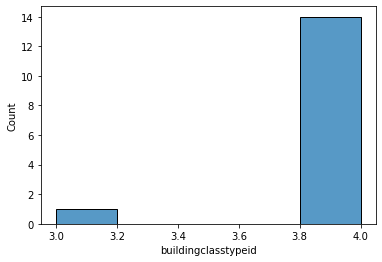

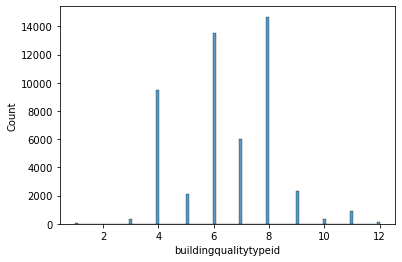

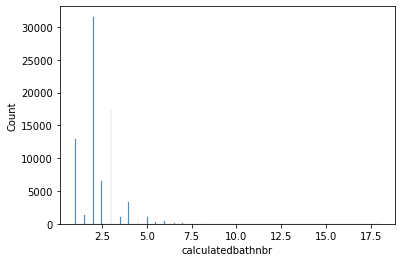

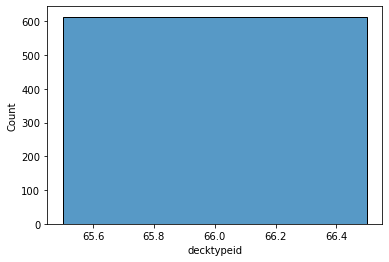

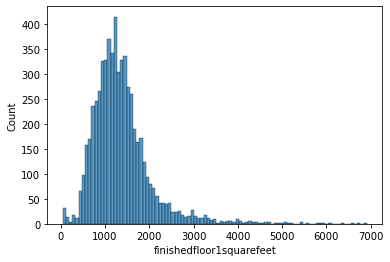

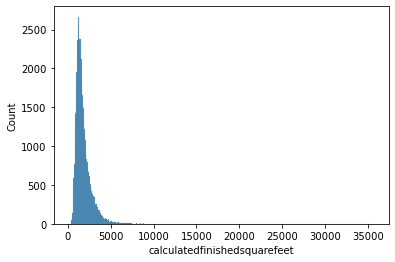

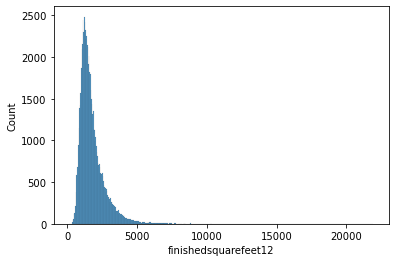

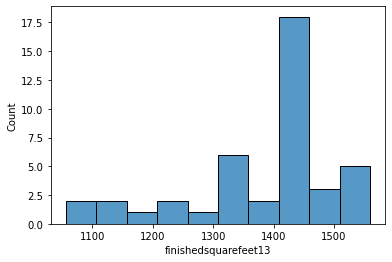

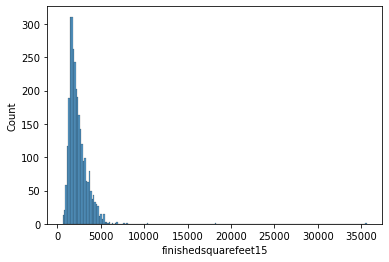

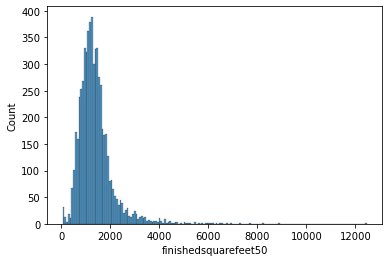

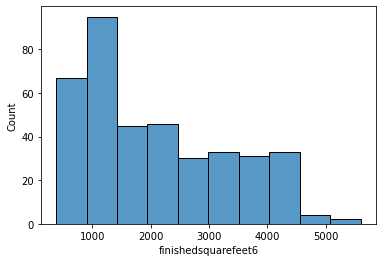

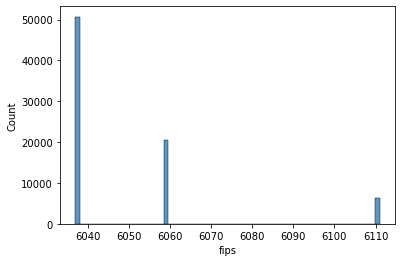

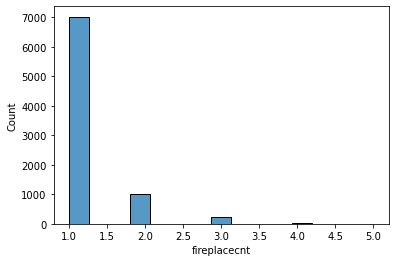

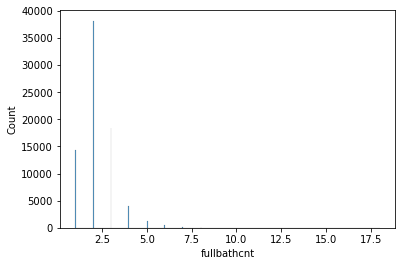

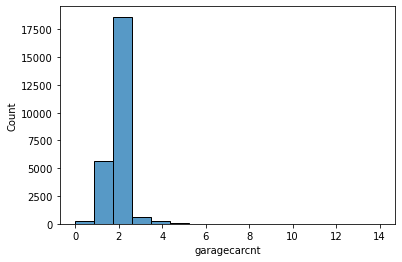

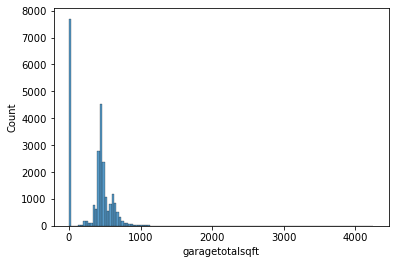

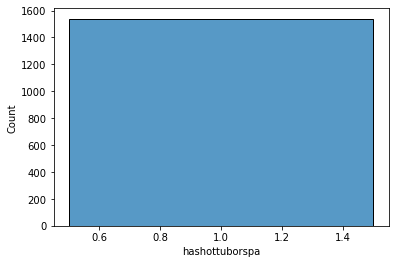

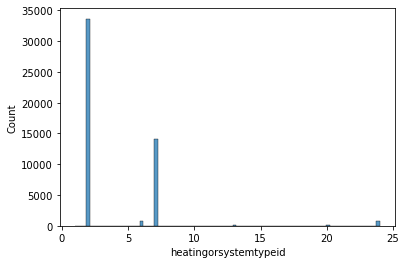

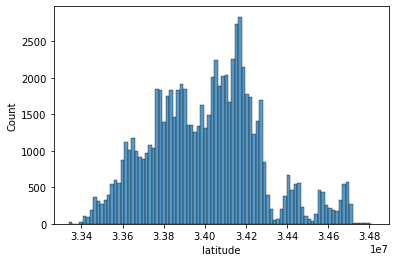

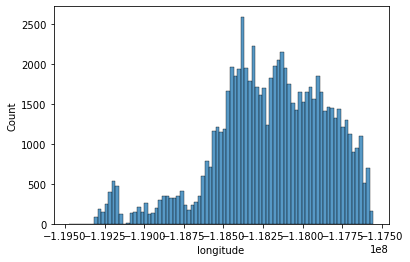

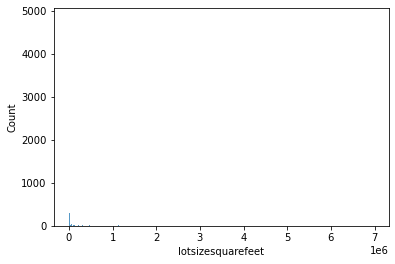

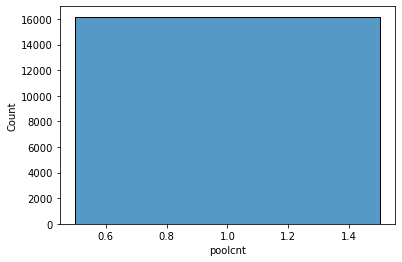

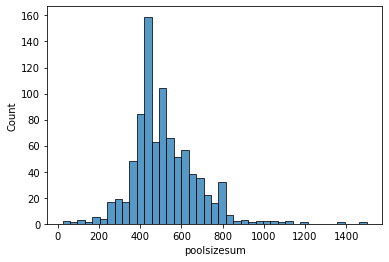

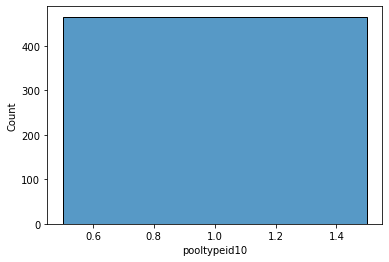

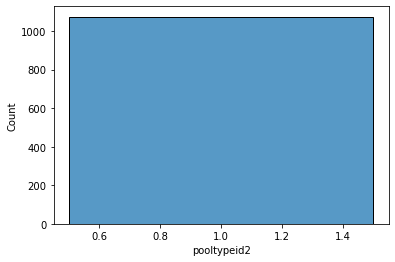

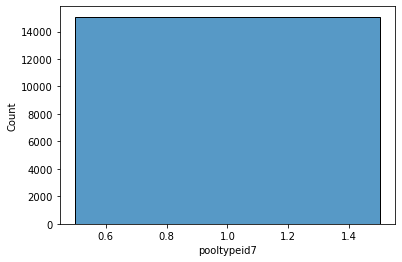

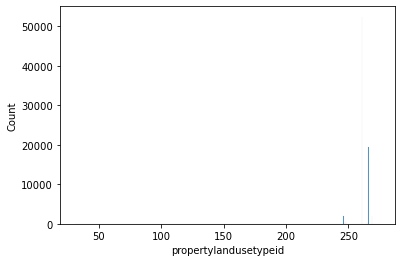

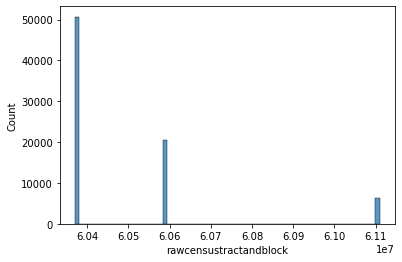

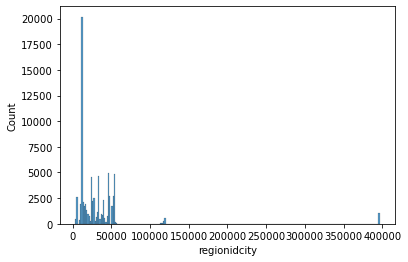

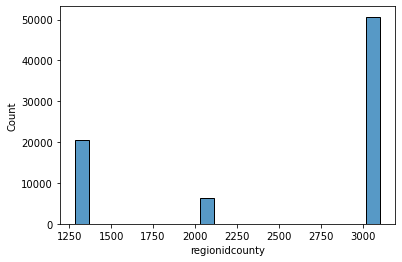

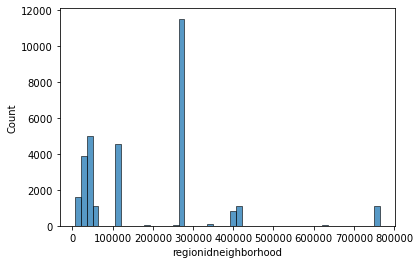

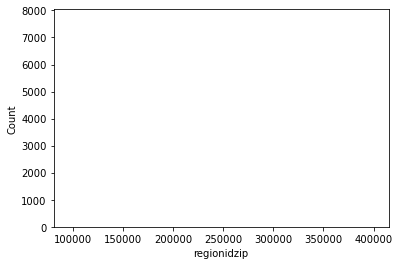

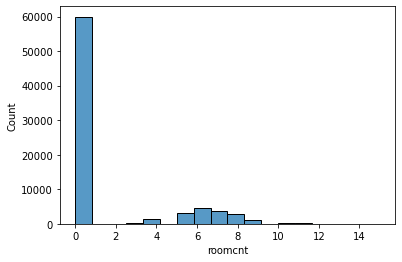

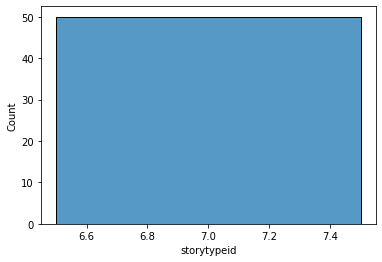

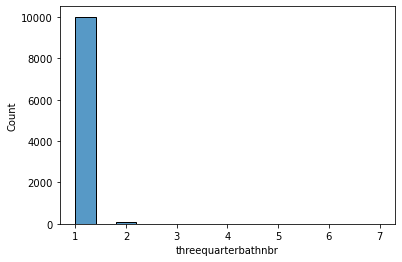

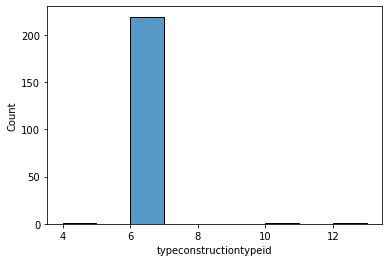

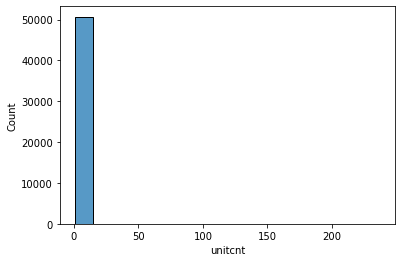

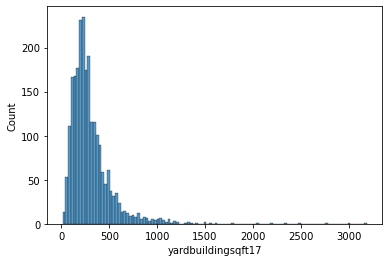

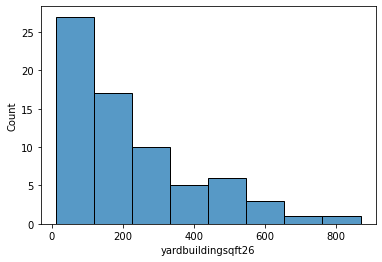

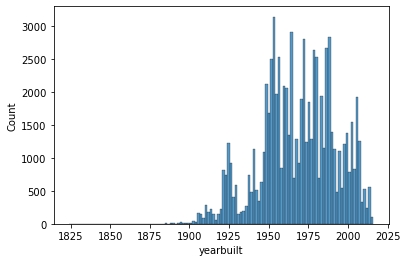

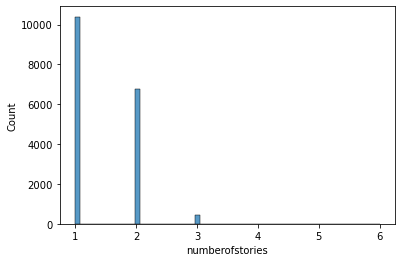

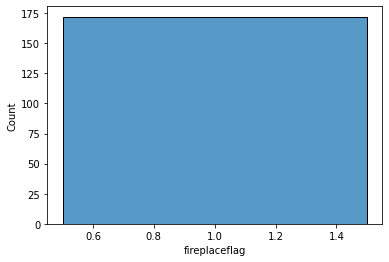

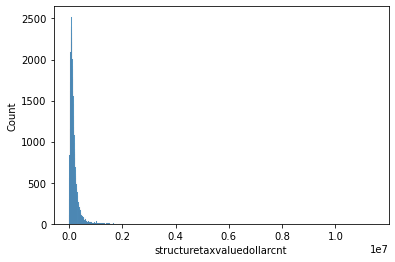

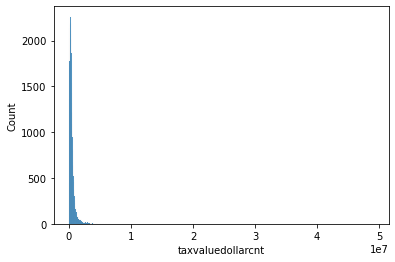

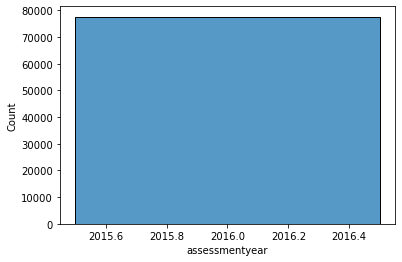

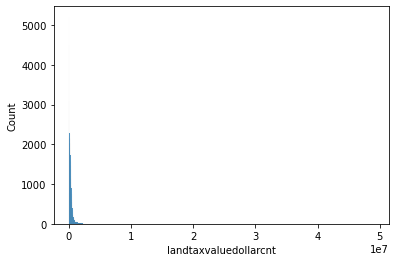

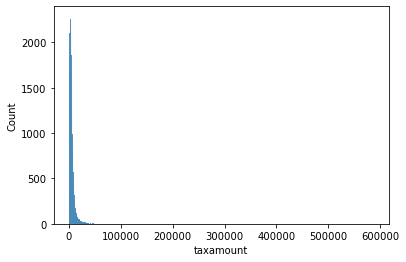

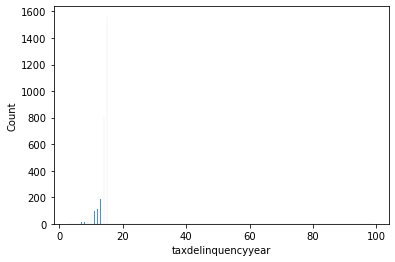

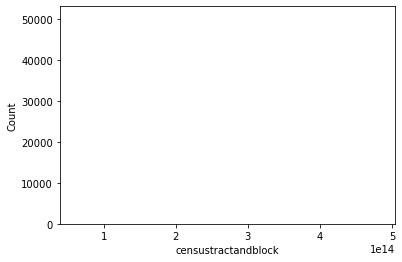

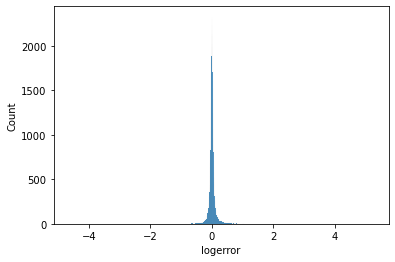

In [7]:
for x in zillow_df.select_dtypes(include = 'float64'):
    sns.histplot(data = zillow_df[x])
    plt.show()

In [8]:
zillow_df = wr.drop_nulls(zillow_df, prop_req_col = .85, prop_req_row = .65)

In [9]:
pd.DataFrame(zillow_df.columns)

,0
0,Unnamed: 0
1,id
2,parcelid
3,bathroomcnt
4,bedroomcnt
5,calculatedbathnbr
6,calculatedfinishedsquarefeet
7,finishedsquarefeet12
8,fips
9,fullbathcnt


In [10]:
zillow_df = zillow_df.drop(columns = ['finishedsquarefeet12','structuretaxvaluedollarcnt','censustractandblock','rawcensustractandblock'])

In [11]:
zillow_df.dtypes

Unnamed: 0                        int64
id                                int64
parcelid                          int64
bathroomcnt                     float64
bedroomcnt                      float64
calculatedbathnbr               float64
calculatedfinishedsquarefeet    float64
fips                            float64
fullbathcnt                     float64
latitude                        float64
longitude                       float64
lotsizesquarefeet               float64
propertycountylandusecode        object
propertylandusetypeid           float64
regionidcity                    float64
regionidcounty                  float64
regionidzip                     float64
roomcnt                         float64
yearbuilt                       float64
taxvaluedollarcnt               float64
assessmentyear                  float64
landtaxvaluedollarcnt           float64
taxamount                       float64
logerror                        float64
transactiondate                  object


In [12]:
zillow_df[['propertylandusetypeid','propertylandusedesc']]

,propertylandusetypeid,propertylandusedesc
0,261.0,Single Family Residential
1,261.0,Single Family Residential
2,261.0,Single Family Residential
3,261.0,Single Family Residential
4,266.0,Condominium
...,...,...
77569,266.0,Condominium
77570,261.0,Single Family Residential
77571,261.0,Single Family Residential
77572,261.0,Single Family Residential


In [13]:
zillow_df.propertylandusedesc.unique()

array(['Single Family Residential', 'Condominium',
       'Duplex (2 Units, Any Combination)', 'Residential General',
       'Planned Unit Development', 'Triplex (3 Units, Any Combination)',
       'Quadruplex (4 Units, Any Combination)', 'Cluster Home',
       'Commercial/Office/Residential Mixed Used', 'Cooperative',
       'Manufactured, Modular, Prefabricated Homes', 'Mobile Home',
       'Townhouse'], dtype=object)

In [14]:
single_list = ['Single Family Residential','Manufactured, Modular, Prefabricated Homes','Mobile Home']

In [15]:
zillow_df = zillow_df[zillow_df['propertylandusedesc'].isin(single_list)]

In [16]:
zillow_df.parcelid.unique().shape

(52452,)

In [17]:
zillow_df.shape

(52571, 26)

In [18]:
zillow_df.drop_duplicates(subset = 'parcelid', inplace = True)

In [19]:
zillow_df.shape

(52452, 26)

In [20]:
zillow_df.id.unique().shape

(52452,)

In [21]:
zillow_df.columns

Index(['Unnamed: 0', 'id', 'parcelid', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'fips',
       'fullbathcnt', 'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid', 'regionidcity',
       'regionidcounty', 'regionidzip', 'roomcnt', 'yearbuilt',
       'taxvaluedollarcnt', 'assessmentyear', 'landtaxvaluedollarcnt',
       'taxamount', 'logerror', 'transactiondate', 'propertylandusedesc'],
      dtype='object')

In [22]:
zillow_num = zillow_df[['bathroomcnt','bedroomcnt','lotsizesquarefeet','taxvaluedollarcnt','taxamount']]

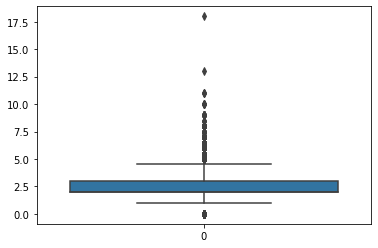

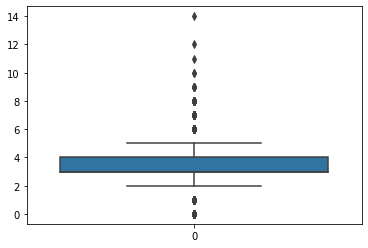

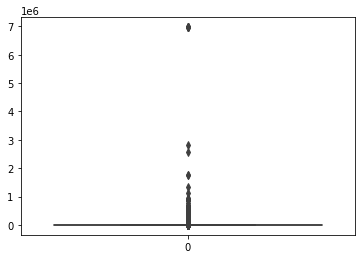

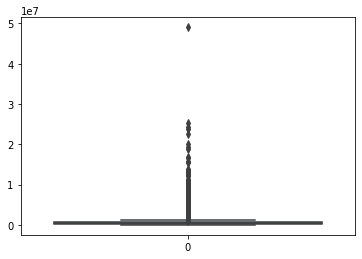

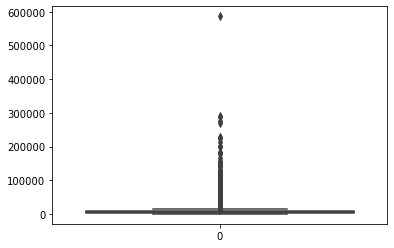

In [23]:
for x in zillow_num:
    sns.boxplot(data =  zillow_num[x])
    plt.show()

In [24]:
zillow_num = wr.remove_outliers(zillow_num,k = 1.5, col_list = ['bathroomcnt','bedroomcnt','lotsizesquarefeet','taxvaluedollarcnt','taxamount'])

In [25]:
zillow_num

,bathroomcnt,bedroomcnt,lotsizesquarefeet,taxvaluedollarcnt,taxamount
0,3.5,4.0,4506.0,1023282.0,11013.72
1,1.0,2.0,12647.0,464000.0,5672.48
2,2.0,3.0,8432.0,564778.0,6488.30
7,1.0,2.0,4214.0,218552.0,2366.08
10,3.0,4.0,10384.0,430108.0,6103.36
...,...,...,...,...,...
77567,2.0,3.0,7499.0,72026.0,1000.70
77568,2.0,4.0,4630.0,346534.0,4175.08
77571,2.0,4.0,12105.0,67205.0,1107.48
77572,1.0,3.0,5074.0,49546.0,876.43


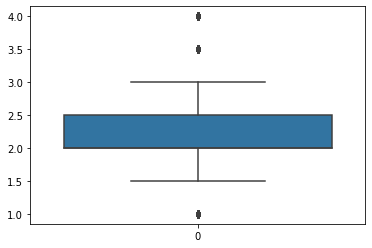

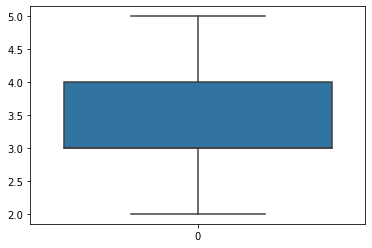

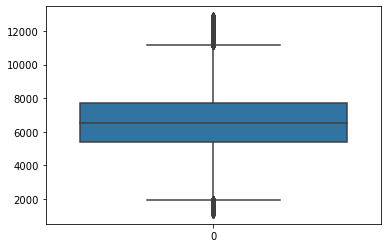

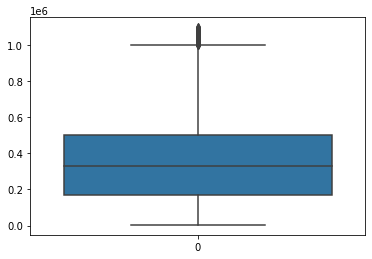

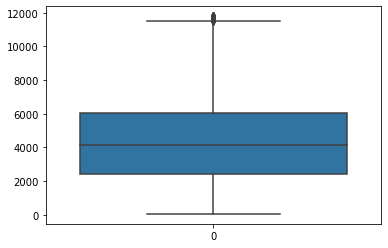

In [26]:
for x in zillow_num:
    sns.boxplot(data =  zillow_num[x])
    plt.show()

In [27]:
zillow_df = wr.remove_outliers(zillow_df, k = 1.5, col_list = ['bathroomcnt','bedroomcnt','lotsizesquarefeet','taxvaluedollarcnt','taxamount'] )

In [28]:
zillow_df

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,...,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc
0,0,1727539,14297519,3.5,4.0,3.5,3100.0,6059.0,3.0,33634931.0,...,96978.0,0.0,1998.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Single Family Residential
1,1,1387261,17052889,1.0,2.0,1.0,1465.0,6111.0,1.0,34449266.0,...,97099.0,5.0,1967.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Single Family Residential
2,2,11677,14186244,2.0,3.0,2.0,1243.0,6059.0,2.0,33886168.0,...,97078.0,6.0,1962.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Single Family Residential
7,7,870991,12069064,1.0,2.0,1.0,738.0,6037.0,1.0,34149214.0,...,96325.0,0.0,1922.0,218552.0,2016.0,199662.0,2366.08,0.101723,2017-01-01,Single Family Residential
10,10,1639362,11104527,3.0,4.0,3.0,2540.0,6037.0,3.0,34434971.0,...,96374.0,0.0,1999.0,430108.0,2016.0,158393.0,6103.36,0.005963,2017-01-02,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77567,77567,1373391,10722691,2.0,3.0,2.0,1570.0,6037.0,2.0,34194943.0,...,96342.0,0.0,1958.0,72026.0,2016.0,25242.0,1000.70,0.081196,2017-09-19,Single Family Residential
77568,77568,2274245,12412492,2.0,4.0,2.0,1633.0,6037.0,2.0,33870815.0,...,96204.0,0.0,1962.0,346534.0,2016.0,221068.0,4175.08,0.001082,2017-09-19,Single Family Residential
77571,77571,2968375,17239384,2.0,4.0,2.0,1612.0,6111.0,2.0,34300140.0,...,97116.0,7.0,1964.0,67205.0,2016.0,16522.0,1107.48,0.013209,2017-09-21,Single Family Residential
77572,77572,1843709,12773139,1.0,3.0,1.0,1032.0,6037.0,1.0,34040895.0,...,96480.0,0.0,1954.0,49546.0,2016.0,16749.0,876.43,0.037129,2017-09-21,Single Family Residential


In [29]:
wr.missing_values_table(zillow_df)

Your selected dataframe has 26 columns.
There are 6columns that have missing values.


,Missing Values,% of Total Values
regionidcity,706,1.7
yearbuilt,16,0.0
calculatedbathnbr,8,0.0
fullbathcnt,8,0.0
regionidzip,7,0.0
calculatedfinishedsquarefeet,4,0.0


Now that nulls are dropped, and outliers are cleaned, time to impute some values. I think at this point I could just delete regionidcity since I still have region id zip that I could technically use. I will impute the other values with the mean. 

In [30]:
def impute(df, strat, col_list):
    ''' take in a df, strategy, and cloumn list
        return df with listed columns imputed using input stratagy
    '''
        
    imputer = SimpleImputer(strategy=strat)  # build imputer

    df[col_list] = imputer.fit_transform(df[col_list]) # fit/transform selected column
    return df

In [31]:
impute(zillow_df, strat = 'mean', col_list = ['yearbuilt','calculatedfinishedsquarefeet'])

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,...,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc
0,0,1727539,14297519,3.5,4.0,3.5,3100.0,6059.0,3.0,33634931.0,...,96978.0,0.0,1998.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Single Family Residential
1,1,1387261,17052889,1.0,2.0,1.0,1465.0,6111.0,1.0,34449266.0,...,97099.0,5.0,1967.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Single Family Residential
2,2,11677,14186244,2.0,3.0,2.0,1243.0,6059.0,2.0,33886168.0,...,97078.0,6.0,1962.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Single Family Residential
7,7,870991,12069064,1.0,2.0,1.0,738.0,6037.0,1.0,34149214.0,...,96325.0,0.0,1922.0,218552.0,2016.0,199662.0,2366.08,0.101723,2017-01-01,Single Family Residential
10,10,1639362,11104527,3.0,4.0,3.0,2540.0,6037.0,3.0,34434971.0,...,96374.0,0.0,1999.0,430108.0,2016.0,158393.0,6103.36,0.005963,2017-01-02,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77567,77567,1373391,10722691,2.0,3.0,2.0,1570.0,6037.0,2.0,34194943.0,...,96342.0,0.0,1958.0,72026.0,2016.0,25242.0,1000.70,0.081196,2017-09-19,Single Family Residential
77568,77568,2274245,12412492,2.0,4.0,2.0,1633.0,6037.0,2.0,33870815.0,...,96204.0,0.0,1962.0,346534.0,2016.0,221068.0,4175.08,0.001082,2017-09-19,Single Family Residential
77571,77571,2968375,17239384,2.0,4.0,2.0,1612.0,6111.0,2.0,34300140.0,...,97116.0,7.0,1964.0,67205.0,2016.0,16522.0,1107.48,0.013209,2017-09-21,Single Family Residential
77572,77572,1843709,12773139,1.0,3.0,1.0,1032.0,6037.0,1.0,34040895.0,...,96480.0,0.0,1954.0,49546.0,2016.0,16749.0,876.43,0.037129,2017-09-21,Single Family Residential


In [32]:
zillow_df = zillow_df.drop(columns = 'regionidcity')

In [33]:
zillow_df

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,...,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc
0,0,1727539,14297519,3.5,4.0,3.5,3100.0,6059.0,3.0,33634931.0,...,96978.0,0.0,1998.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Single Family Residential
1,1,1387261,17052889,1.0,2.0,1.0,1465.0,6111.0,1.0,34449266.0,...,97099.0,5.0,1967.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Single Family Residential
2,2,11677,14186244,2.0,3.0,2.0,1243.0,6059.0,2.0,33886168.0,...,97078.0,6.0,1962.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Single Family Residential
7,7,870991,12069064,1.0,2.0,1.0,738.0,6037.0,1.0,34149214.0,...,96325.0,0.0,1922.0,218552.0,2016.0,199662.0,2366.08,0.101723,2017-01-01,Single Family Residential
10,10,1639362,11104527,3.0,4.0,3.0,2540.0,6037.0,3.0,34434971.0,...,96374.0,0.0,1999.0,430108.0,2016.0,158393.0,6103.36,0.005963,2017-01-02,Single Family Residential
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77567,77567,1373391,10722691,2.0,3.0,2.0,1570.0,6037.0,2.0,34194943.0,...,96342.0,0.0,1958.0,72026.0,2016.0,25242.0,1000.70,0.081196,2017-09-19,Single Family Residential
77568,77568,2274245,12412492,2.0,4.0,2.0,1633.0,6037.0,2.0,33870815.0,...,96204.0,0.0,1962.0,346534.0,2016.0,221068.0,4175.08,0.001082,2017-09-19,Single Family Residential
77571,77571,2968375,17239384,2.0,4.0,2.0,1612.0,6111.0,2.0,34300140.0,...,97116.0,7.0,1964.0,67205.0,2016.0,16522.0,1107.48,0.013209,2017-09-21,Single Family Residential
77572,77572,1843709,12773139,1.0,3.0,1.0,1032.0,6037.0,1.0,34040895.0,...,96480.0,0.0,1954.0,49546.0,2016.0,16749.0,876.43,0.037129,2017-09-21,Single Family Residential


In [34]:
zillow_df['county'] = zillow_df['fips'].replace(to_replace = [6037, 6059, 6111], value = ['LA','Orange','Ventura'])

In [35]:
zillow_df = zillow_df.drop(columns = 'fips')

In [36]:
zillow_df.head()

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fullbathcnt,latitude,longitude,...,roomcnt,yearbuilt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,logerror,transactiondate,propertylandusedesc,county
0,0,1727539,14297519,3.5,4.0,3.5,3100.0,3.0,33634931.0,-117869207.0,...,0.0,1998.0,1023282.0,2016.0,537569.0,11013.72,0.025595,2017-01-01,Single Family Residential,Orange
1,1,1387261,17052889,1.0,2.0,1.0,1465.0,1.0,34449266.0,-119281531.0,...,5.0,1967.0,464000.0,2016.0,376000.0,5672.48,0.055619,2017-01-01,Single Family Residential,Ventura
2,2,11677,14186244,2.0,3.0,2.0,1243.0,2.0,33886168.0,-117823170.0,...,6.0,1962.0,564778.0,2016.0,479489.0,6488.30,0.005383,2017-01-01,Single Family Residential,Orange
7,7,870991,12069064,1.0,2.0,1.0,738.0,1.0,34149214.0,-118239357.0,...,0.0,1922.0,218552.0,2016.0,199662.0,2366.08,0.101723,2017-01-01,Single Family Residential,LA
10,10,1639362,11104527,3.0,4.0,3.0,2540.0,3.0,34434971.0,-118464390.0,...,0.0,1999.0,430108.0,2016.0,158393.0,6103.36,0.005963,2017-01-02,Single Family Residential,LA


In [37]:
zillow_df.columns

Index(['Unnamed: 0', 'id', 'parcelid', 'bathroomcnt', 'bedroomcnt',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet', 'fullbathcnt',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycountylandusecode', 'propertylandusetypeid', 'regionidcounty',
       'regionidzip', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt',
       'assessmentyear', 'landtaxvaluedollarcnt', 'taxamount', 'logerror',
       'transactiondate', 'propertylandusedesc', 'county'],
      dtype='object')

In [38]:
zillow_df = zillow_df.drop(columns = ['propertylandusetypeid','propertycountylandusecode','roomcnt','transactiondate','regionidcounty'])

In [39]:
zillow_df.shape

(41057, 20)

In [40]:
clean_df = wr.wrangle_zillow()

In [41]:
clean_df.columns

Index(['id', 'parcelid', 'bathroomcnt', 'bedroomcnt',
       'calculatedfinishedsquarefeet', 'latitude', 'longitude',
       'lotsizesquarefeet', 'yearbuilt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount', 'logerror', 'propertylandusedesc',
       'county'],
      dtype='object')

In [42]:
clean_df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,44039.0,1.496087e+06,8.589188e+05,3.550000e+02,7.582770e+05,1.497808e+06,2.240202e+06,2.982167e+06
parcelid,44039.0,1.297207e+07,2.150385e+06,1.071186e+07,1.151226e+07,1.261842e+07,1.410872e+07,1.629608e+08
bathroomcnt,44039.0,2.085561e+00,7.363994e-01,1.000000e+00,2.000000e+00,2.000000e+00,2.500000e+00,4.000000e+00
bedroomcnt,44039.0,3.199550e+00,8.478721e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,6.000000e+00
calculatedfinishedsquarefeet,44039.0,1.689670e+03,6.374105e+02,1.520000e+02,1.227000e+03,1.555000e+03,2.036000e+03,5.493000e+03
latitude,44039.0,3.402260e+07,2.701766e+05,3.334085e+07,3.382998e+07,3.400756e+07,3.419034e+07,3.472023e+07
longitude,44039.0,-1.181883e+08,3.532717e+05,-1.194753e+08,-1.183809e+08,-1.181401e+08,-1.179355e+08,-1.175546e+08
lotsizesquarefeet,44039.0,7.032648e+03,2.869854e+03,2.360000e+02,5.434000e+03,6.600000e+03,7.976000e+03,1.993300e+04
yearbuilt,44015.0,1.961509e+03,2.176626e+01,1.878000e+03,1.950000e+03,1.959000e+03,1.976000e+03,2.016000e+03
taxvaluedollarcnt,44039.0,3.620064e+05,2.319986e+05,3.254000e+03,1.717180e+05,3.304610e+05,5.090000e+05,1.103000e+06


### Exploration hypotheses:
- county influences log error
- tax value influences log error
- year buit influences log error
- california tax rate is set at 1%, but I know from previous work there are some outliers in tax rate. Perhaps look at those?

In [43]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44039 entries, 0 to 77573
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            44039 non-null  int64  
 1   parcelid                      44039 non-null  int64  
 2   bathroomcnt                   44039 non-null  float64
 3   bedroomcnt                    44039 non-null  float64
 4   calculatedfinishedsquarefeet  44039 non-null  float64
 5   latitude                      44039 non-null  float64
 6   longitude                     44039 non-null  float64
 7   lotsizesquarefeet             44039 non-null  float64
 8   yearbuilt                     44015 non-null  float64
 9   taxvaluedollarcnt             44039 non-null  float64
 10  landtaxvaluedollarcnt         44039 non-null  float64
 11  taxamount                     44039 non-null  float64
 12  logerror                      44039 non-null  float64
 13  p

In [44]:
clean_df = wr.get_dummies(clean_df, clean_df[['county','propertylandusedesc']])


In [45]:
clean_df.isnull().sum()

id                                                0
parcelid                                          0
bathroomcnt                                       0
bedroomcnt                                        0
calculatedfinishedsquarefeet                      0
latitude                                          0
longitude                                         0
lotsizesquarefeet                                 0
yearbuilt                                        24
taxvaluedollarcnt                                 0
landtaxvaluedollarcnt                             0
taxamount                                         0
logerror                                          0
propertylandusedesc                               0
county                                            0
county_Orange                                     0
county_Ventura                                    0
propertylandusedesc_Mobile Home                   0
propertylandusedesc_Single Family Residential     0
dtype: int64

In [46]:
clean_df.yearbuilt = clean_df.yearbuilt.fillna(value = 1965)

In [47]:
train, validate, test = wr.train_validate_test_split(clean_df)

<AxesSubplot:>

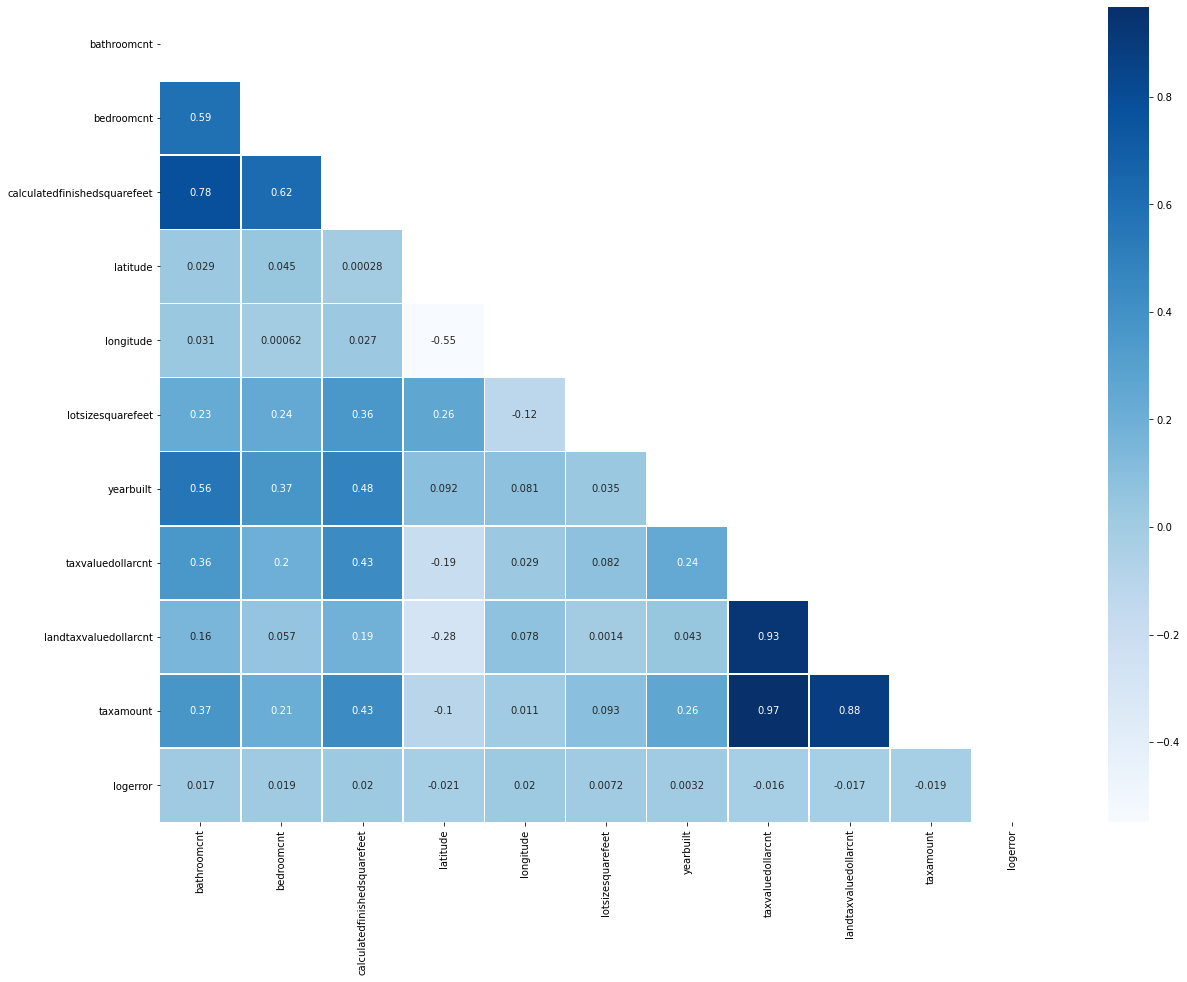

In [48]:
plt.figure(figsize = (20,15))
ex.heat_corr(train.select_dtypes(include = 'float64'))

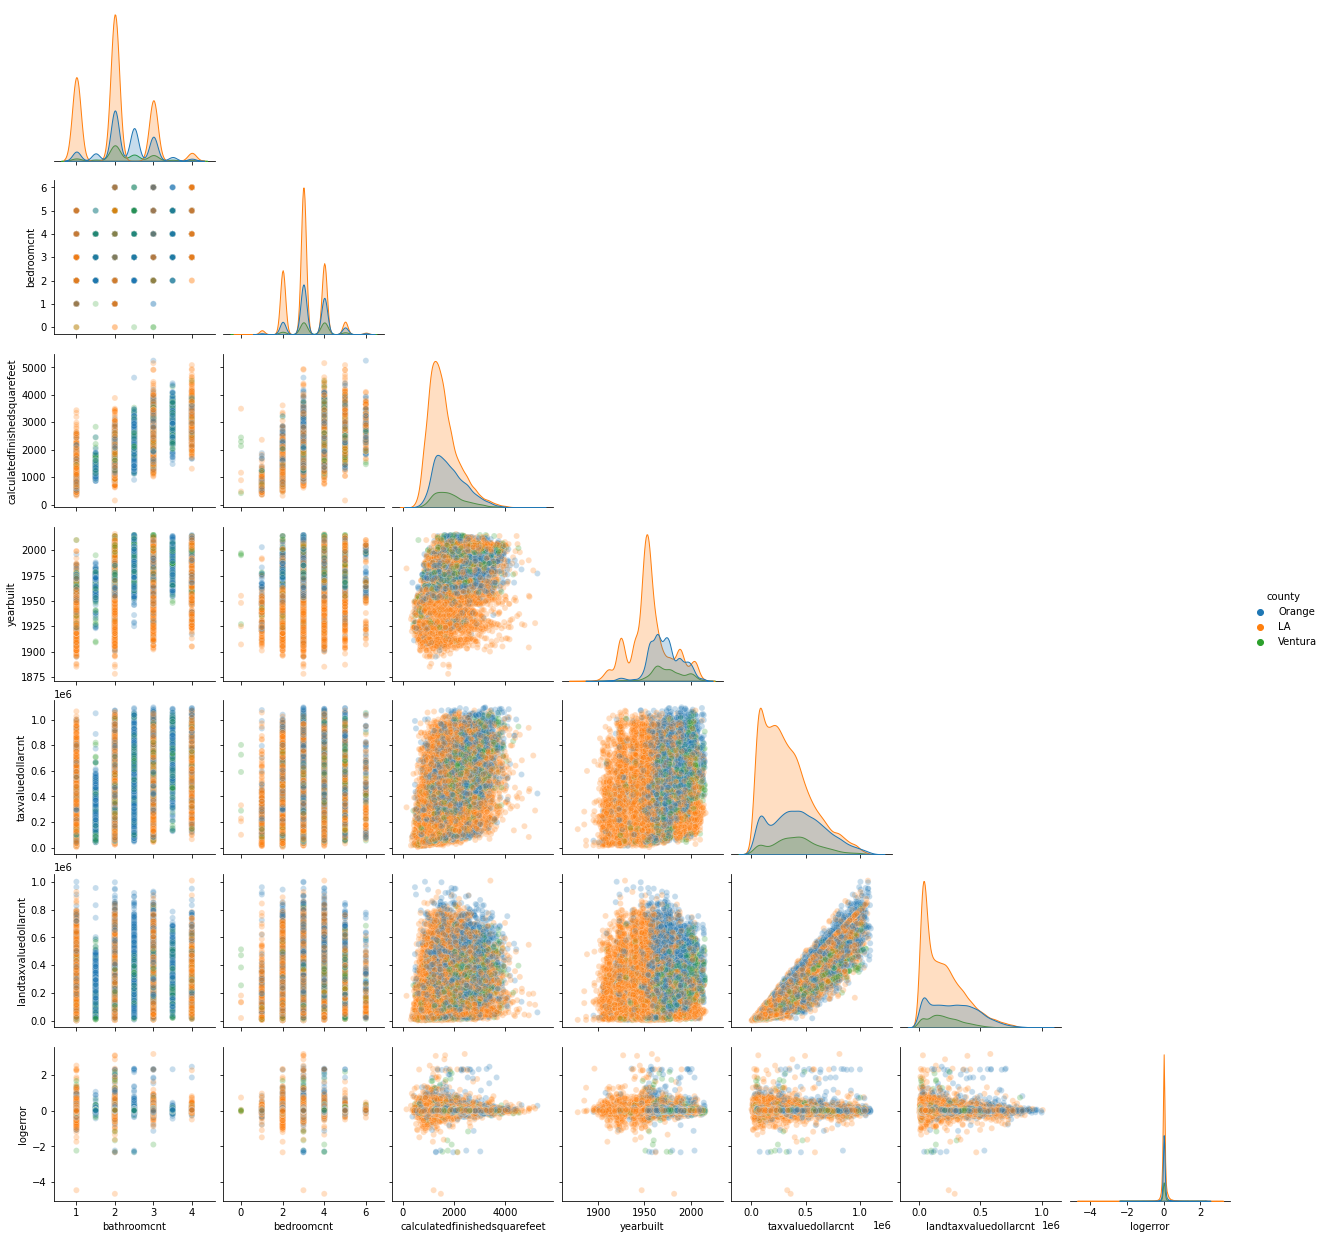

In [49]:
sns.pairplot(train[['bathroomcnt','bedroomcnt','calculatedfinishedsquarefeet',\
                    'yearbuilt','taxvaluedollarcnt',\
                    'landtaxvaluedollarcnt','county','logerror']], hue = 'county', corner = True, plot_kws = {'alpha' :.25})

In [50]:
train

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,propertylandusedesc,county,county_Orange,county_Ventura,propertylandusedesc_Mobile Home,propertylandusedesc_Single Family Residential
66141,1475377,13977911,2.5,2.0,1738.0,33683792.0,-118003519.0,2086.0,2002.0,802047.0,607639.0,8997.18,0.012019,Single Family Residential,Orange,1,0,0,1
52955,2856452,12631010,2.0,3.0,1449.0,33797505.0,-118266036.0,5171.0,1958.0,270562.0,201596.0,3432.97,0.079414,Single Family Residential,LA,0,0,0,1
58700,1583746,11091389,3.0,4.0,2184.0,34246628.0,-118544155.0,7460.0,1963.0,410556.0,235603.0,5088.77,0.029079,Single Family Residential,LA,0,0,0,1
71744,1755016,12991299,2.0,3.0,1124.0,34063430.0,-117976280.0,5836.0,1955.0,263032.0,157331.0,3475.87,0.022649,Single Family Residential,LA,0,0,0,1
58380,2632563,12616571,2.0,3.0,1286.0,33849772.0,-118252964.0,4626.0,1970.0,326748.0,221638.0,4518.19,0.006161,Single Family Residential,LA,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,1518169,14202632,3.0,5.0,2834.0,33880952.0,-117703856.0,8800.0,1990.0,590931.0,300265.0,7061.22,-0.011512,Single Family Residential,Orange,1,0,0,1
23319,2243609,12190057,1.0,2.0,736.0,33975813.0,-118284277.0,5400.0,1918.0,123809.0,88045.0,1626.00,-0.059803,Single Family Residential,LA,0,0,0,1
18509,209760,17271049,2.5,4.0,2614.0,34172606.0,-118948759.0,7254.0,1979.0,698056.0,349028.0,7791.36,0.014498,Single Family Residential,Ventura,0,1,0,1
19779,2369101,14484432,3.0,4.0,3046.0,33622587.0,-117620226.0,5000.0,1992.0,876000.0,535241.0,11098.68,-0.078957,Single Family Residential,Orange,1,0,0,1


In [51]:
X_train = train.drop(columns = ['logerror','propertylandusedesc','county'])
y_train = train['logerror']
X_validate = validate.drop(columns = ['logerror','propertylandusedesc','county'])
y_validate = validate['logerror']
X_test= test.drop(columns = ['logerror','propertylandusedesc','county'])
y_test = test['logerror']

In [52]:
ex.rfe(X_train, y_train, rankings = True)

id                                               14
parcelid                                         15
bathroomcnt                                       5
bedroomcnt                                        3
calculatedfinishedsquarefeet                      7
latitude                                         12
longitude                                        13
lotsizesquarefeet                                 9
yearbuilt                                         6
taxvaluedollarcnt                                10
landtaxvaluedollarcnt                            11
taxamount                                         8
county_Orange                                     2
county_Ventura                                    4
propertylandusedesc_Mobile Home                   1
propertylandusedesc_Single Family Residential     1
dtype: int64

In [67]:
mobile_df = train[train['propertylandusedesc_Mobile Home'] == 1]
mobile_df

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,propertylandusedesc,county,county_Orange,county_Ventura,propertylandusedesc_Mobile Home,propertylandusedesc_Single Family Residential
10393,1967958,11300905,2.0,3.0,1926.0,34678627.0,-118086433.0,6219.0,2004.0,73422.0,32632.0,1716.43,0.118527,Mobile Home,LA,0,0,1,0
29825,2329742,11325912,2.0,3.0,1539.0,34466850.0,-118197645.0,7289.0,1989.0,159047.0,47746.0,1962.79,-0.020862,Mobile Home,LA,0,0,1,0
6420,940905,10746693,2.0,2.0,1920.0,34131892.0,-118812965.0,6509.0,1975.0,332872.0,260058.0,4046.62,0.538654,Mobile Home,LA,0,0,1,0
20093,1252242,11262624,2.0,3.0,1836.0,34655953.0,-118214401.0,14557.0,2005.0,105464.0,26312.0,1955.57,0.139289,Mobile Home,LA,0,0,1,0


In [69]:
home_df = train[train['propertylandusedesc_Single Family Residential'] == 1]
home_df

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,propertylandusedesc,county,county_Orange,county_Ventura,propertylandusedesc_Mobile Home,propertylandusedesc_Single Family Residential
66141,1475377,13977911,2.5,2.0,1738.0,33683792.0,-118003519.0,2086.0,2002.0,802047.0,607639.0,8997.18,0.012019,Single Family Residential,Orange,1,0,0,1
52955,2856452,12631010,2.0,3.0,1449.0,33797505.0,-118266036.0,5171.0,1958.0,270562.0,201596.0,3432.97,0.079414,Single Family Residential,LA,0,0,0,1
58700,1583746,11091389,3.0,4.0,2184.0,34246628.0,-118544155.0,7460.0,1963.0,410556.0,235603.0,5088.77,0.029079,Single Family Residential,LA,0,0,0,1
71744,1755016,12991299,2.0,3.0,1124.0,34063430.0,-117976280.0,5836.0,1955.0,263032.0,157331.0,3475.87,0.022649,Single Family Residential,LA,0,0,0,1
58380,2632563,12616571,2.0,3.0,1286.0,33849772.0,-118252964.0,4626.0,1970.0,326748.0,221638.0,4518.19,0.006161,Single Family Residential,LA,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29998,1518169,14202632,3.0,5.0,2834.0,33880952.0,-117703856.0,8800.0,1990.0,590931.0,300265.0,7061.22,-0.011512,Single Family Residential,Orange,1,0,0,1
23319,2243609,12190057,1.0,2.0,736.0,33975813.0,-118284277.0,5400.0,1918.0,123809.0,88045.0,1626.00,-0.059803,Single Family Residential,LA,0,0,0,1
18509,209760,17271049,2.5,4.0,2614.0,34172606.0,-118948759.0,7254.0,1979.0,698056.0,349028.0,7791.36,0.014498,Single Family Residential,Ventura,0,1,0,1
19779,2369101,14484432,3.0,4.0,3046.0,33622587.0,-117620226.0,5000.0,1992.0,876000.0,535241.0,11098.68,-0.078957,Single Family Residential,Orange,1,0,0,1


In [72]:
zillow_df.propertylandusedesc.unique()

array(['Single Family Residential',
       'Manufactured, Modular, Prefabricated Homes', 'Mobile Home'],
      dtype=object)

In [78]:
prefab_df = train[(train['propertylandusedesc_Single Family Residential'] == 0) &  (train['propertylandusedesc_Mobile Home'] == 0)]
prefab_df

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,propertylandusedesc,county,county_Orange,county_Ventura,propertylandusedesc_Mobile Home,propertylandusedesc_Single Family Residential
63143,2312071,17190590,2.0,2.0,1440.0,34200559.0,-118989347.0,3952.0,1972.0,152340.0,20681.0,1602.36,0.224644,"Manufactured, Modular, Prefabricated Homes",Ventura,0,1,0,0
64450,1790473,17096417,2.0,2.0,1200.0,34338200.0,-119089000.0,4454.0,1984.0,175260.0,129828.0,1997.84,0.233674,"Manufactured, Modular, Prefabricated Homes",Ventura,0,1,0,0
52378,1894956,17190684,2.0,2.0,1560.0,34199002.0,-118988736.0,3965.0,2001.0,223588.0,147251.0,2359.52,0.271465,"Manufactured, Modular, Prefabricated Homes",Ventura,0,1,0,0
64433,433114,17095640,2.0,2.0,1152.0,34287531.0,-119147239.0,3876.0,1986.0,147324.0,93450.0,1547.52,-0.009844,"Manufactured, Modular, Prefabricated Homes",Ventura,0,1,0,0
58072,2953057,17094711,2.0,3.0,1392.0,34277900.0,-119164000.0,4125.0,1984.0,335000.0,296500.0,3575.52,0.001698,"Manufactured, Modular, Prefabricated Homes",Ventura,0,1,0,0
56278,2073828,17190658,2.0,2.0,1344.0,34199446.0,-118989810.0,3464.0,1974.0,189114.0,169307.0,2067.54,-0.329129,"Manufactured, Modular, Prefabricated Homes",Ventura,0,1,0,0
62925,1298379,17190604,2.0,2.0,1488.0,34200216.0,-118989791.0,3468.0,1973.0,240000.0,212000.0,2533.92,0.124846,"Manufactured, Modular, Prefabricated Homes",Ventura,0,1,0,0
74339,2207672,17115776,2.0,2.0,1440.0,34266600.0,-119199000.0,3780.0,1981.0,310000.0,278000.0,3315.36,0.234087,"Manufactured, Modular, Prefabricated Homes",Ventura,0,1,0,0
26416,60448,17190464,2.0,2.0,1440.0,34203228.0,-118993777.0,4424.0,1972.0,160947.0,130690.0,1693.82,0.229085,"Manufactured, Modular, Prefabricated Homes",Ventura,0,1,0,0
35425,1193565,17115813,2.0,2.0,1440.0,34266900.0,-119196757.0,3780.0,1981.0,310000.0,287000.0,3242.46,0.095967,"Manufactured, Modular, Prefabricated Homes",Ventura,0,1,0,0


In [81]:
stats.levene(home_df['logerror'],mobile_df['logerror'])

LeveneResult(statistic=0.9503688730197065, pvalue=0.3296349931536968)

In [82]:
stats.ttest_ind(home_df['logerror'],mobile_df['logerror'], equal_var=True)

Ttest_indResult(statistic=-2.057376196363431, pvalue=0.039660553546678384)

In [83]:
stats.levene(home_df['logerror'],prefab_df['logerror'])

LeveneResult(statistic=2.3929342953144097, pvalue=0.12189749219995426)

In [84]:
stats.ttest_ind(home_df['logerror'],prefab_df['logerror'], equal_var=True)

Ttest_indResult(statistic=-1.9425924109282475, pvalue=0.05207679493267276)

In [85]:
stats.levene(mobile_df['logerror'],prefab_df['logerror'])

LeveneResult(statistic=0.18533523792948753, pvalue=0.6706692202634388)

In [86]:
stats.ttest_ind(mobile_df['logerror'],prefab_df['logerror'], equal_var=True)

Ttest_indResult(statistic=1.1723454810793938, pvalue=0.2525643816307907)

All property types have equal variances, but the only significant result is between the single unit  home log error and mobile home log error. Since it has a larger dataset than the prefabricated homes, it is easier to get a p value that is significant. What is interesting is that mobile homes have the largest mean log error, but again that may be due to a sample size of around 5 for that selection

Compare by county 

In [90]:
vent_df = train[train['county_Ventura'] == 1]
vent_df

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,propertylandusedesc,county,county_Orange,county_Ventura,propertylandusedesc_Mobile Home,propertylandusedesc_Single Family Residential
72210,671714,17146609,2.0,4.0,2034.0,34212555.0,-119198227.0,6014.0,1973.0,292294.0,108054.0,1994.66,-0.010055,Single Family Residential,Ventura,0,1,0,1
9428,1611864,17266807,1.0,2.0,816.0,34167413.0,-118937904.0,9157.0,1971.0,112495.0,28108.0,1213.54,-0.023882,Single Family Residential,Ventura,0,1,0,1
21651,850997,17215605,3.0,4.0,2347.0,34222908.0,-118889568.0,6777.0,1976.0,200565.0,20485.0,2367.54,0.014377,Single Family Residential,Ventura,0,1,0,1
41468,1835951,17282522,4.0,4.0,1919.0,34205094.0,-118848124.0,13175.0,1959.0,344457.0,105171.0,3725.42,-0.015723,Single Family Residential,Ventura,0,1,0,1
36822,2295912,17209025,3.0,4.0,2382.0,34215933.0,-118898173.0,10060.0,1968.0,148874.0,18500.0,1595.96,-0.063423,Single Family Residential,Ventura,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28953,656677,17090500,2.0,3.0,1814.0,34292787.0,-119165814.0,8820.0,1973.0,568505.0,369684.0,5985.14,-0.017858,Single Family Residential,Ventura,0,1,0,1
54274,311890,17243773,3.0,4.0,2262.0,34268356.0,-118776613.0,3500.0,2002.0,575000.0,374000.0,6529.30,0.100116,Single Family Residential,Ventura,0,1,0,1
65622,358218,17064683,2.0,3.0,1243.0,34399765.0,-118926818.0,6120.0,1978.0,267289.0,106914.0,3100.00,0.051874,Single Family Residential,Ventura,0,1,0,1
41801,1611462,17149196,2.0,4.0,1615.0,34190657.0,-119218066.0,8947.0,1976.0,355716.0,208926.0,4261.52,0.032034,Single Family Residential,Ventura,0,1,0,1


In [91]:
orange_df = train[train['county_Orange'] == 1]
orange_df

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,propertylandusedesc,county,county_Orange,county_Ventura,propertylandusedesc_Mobile Home,propertylandusedesc_Single Family Residential
66141,1475377,13977911,2.5,2.0,1738.0,33683792.0,-118003519.0,2086.0,2002.0,802047.0,607639.0,8997.18,0.012019,Single Family Residential,Orange,1,0,0,1
49986,1653175,14378453,2.0,3.0,1339.0,33636503.0,-117704954.0,3660.0,1973.0,592829.0,485351.0,6190.86,-0.147881,Single Family Residential,Orange,1,0,0,1
54468,2635062,13936053,2.0,3.0,1373.0,33802487.0,-117929972.0,7110.0,1959.0,419805.0,317822.0,5044.10,0.065186,Single Family Residential,Orange,1,0,0,1
35771,2087932,14135655,3.5,3.0,2346.0,33879895.0,-117956027.0,1902.0,2013.0,444889.0,134725.0,8801.88,0.008090,Single Family Residential,Orange,1,0,0,1
18421,2650991,14161247,2.5,4.0,3389.0,33920794.0,-117856572.0,9078.0,1981.0,693479.0,392413.0,8348.74,-0.012242,Single Family Residential,Orange,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64979,338352,13835851,2.0,3.0,1180.0,33766370.0,-117888944.0,6001.0,1955.0,467015.0,407153.0,5558.76,-0.007021,Single Family Residential,Orange,1,0,0,1
26385,159609,13883394,1.5,3.0,1342.0,33837380.0,-117893066.0,6100.0,1953.0,270564.0,208714.0,3294.90,0.008095,Single Family Residential,Orange,1,0,0,1
38966,384000,14038053,2.0,4.0,1351.0,33733539.0,-118007939.0,7000.0,1962.0,647619.0,577481.0,7308.20,0.325334,Single Family Residential,Orange,1,0,0,1
29998,1518169,14202632,3.0,5.0,2834.0,33880952.0,-117703856.0,8800.0,1990.0,590931.0,300265.0,7061.22,-0.011512,Single Family Residential,Orange,1,0,0,1


In [92]:
la_df = train[(train['county_Orange'] == 0) & (train['county_Ventura'] == 0)]
la_df

,id,parcelid,bathroomcnt,bedroomcnt,calculatedfinishedsquarefeet,latitude,longitude,lotsizesquarefeet,yearbuilt,taxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,logerror,propertylandusedesc,county,county_Orange,county_Ventura,propertylandusedesc_Mobile Home,propertylandusedesc_Single Family Residential
52955,2856452,12631010,2.0,3.0,1449.0,33797505.0,-118266036.0,5171.0,1958.0,270562.0,201596.0,3432.97,0.079414,Single Family Residential,LA,0,0,0,1
58700,1583746,11091389,3.0,4.0,2184.0,34246628.0,-118544155.0,7460.0,1963.0,410556.0,235603.0,5088.77,0.029079,Single Family Residential,LA,0,0,0,1
71744,1755016,12991299,2.0,3.0,1124.0,34063430.0,-117976280.0,5836.0,1955.0,263032.0,157331.0,3475.87,0.022649,Single Family Residential,LA,0,0,0,1
58380,2632563,12616571,2.0,3.0,1286.0,33849772.0,-118252964.0,4626.0,1970.0,326748.0,221638.0,4518.19,0.006161,Single Family Residential,LA,0,0,0,1
70327,888439,12697469,2.0,4.0,1934.0,33738862.0,-118338955.0,12161.0,1967.0,123185.0,49477.0,1697.99,0.045625,Single Family Residential,LA,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39626,1885947,12220041,1.0,2.0,844.0,33939867.0,-118260591.0,5199.0,1941.0,182282.0,114999.0,2413.42,-0.029639,Single Family Residential,LA,0,0,0,1
22630,2735326,12231807,2.0,3.0,1346.0,33937307.0,-118238713.0,6250.0,1930.0,232365.0,78303.0,3051.48,0.036134,Single Family Residential,LA,0,0,0,1
61880,600073,11320445,3.0,5.0,2459.0,34642060.0,-118257859.0,12439.0,1993.0,336171.0,54690.0,5126.65,0.008257,Single Family Residential,LA,0,0,0,1
23319,2243609,12190057,1.0,2.0,736.0,33975813.0,-118284277.0,5400.0,1918.0,123809.0,88045.0,1626.00,-0.059803,Single Family Residential,LA,0,0,0,1


In [93]:
stats.levene(vent_df['logerror'],orange_df['logerror'])

LeveneResult(statistic=0.16656201510330804, pvalue=0.6831954840123465)

In [94]:
stats.ttest_ind(vent_df['logerror'],orange_df['logerror'], equal_var=True)

Ttest_indResult(statistic=-2.1458020774782076, pvalue=0.03191618192631628)

In [95]:
stats.levene(vent_df['logerror'],la_df['logerror'])

LeveneResult(statistic=13.002327195207867, pvalue=0.0003119447354533434)

In [96]:
stats.ttest_ind(vent_df['logerror'],orange_df['logerror'], equal_var=False)

Ttest_indResult(statistic=-2.1874610315988745, pvalue=0.028772098832710438)

In [97]:
stats.levene(la_df['logerror'],orange_df['logerror'])

LeveneResult(statistic=23.05163546444907, pvalue=1.587191092650585e-06)

In [98]:
stats.ttest_ind(la_df['logerror'],orange_df['logerror'], equal_var=False)

Ttest_indResult(statistic=-3.6678733019238146, pvalue=0.0002456701444744058)

LA county differs significantly from both ventura and orange counties. Ventura and Orange do not differ significantly from each other. 

In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24661 entries, 66141 to 57854
Data columns (total 19 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   id                                             24661 non-null  int64  
 1   parcelid                                       24661 non-null  int64  
 2   bathroomcnt                                    24661 non-null  float64
 3   bedroomcnt                                     24661 non-null  float64
 4   calculatedfinishedsquarefeet                   24661 non-null  float64
 5   latitude                                       24661 non-null  float64
 6   longitude                                      24661 non-null  float64
 7   lotsizesquarefeet                              24661 non-null  float64
 8   yearbuilt                                      24661 non-null  float64
 9   taxvaluedollarcnt                             